# Gráficos con SeaBorn
- Dende Python, conecta coa máquina que ten o dataset de COVID de Italia.
- Carga o dataset nun DataFrame de PANDAS (podes empregar o código da práctica anterior).
- Pon unha variable en función da cal se lea de mongo ou se empregue o read_json() para ler o dataset dun arquivo no seu lugar.
- Debuxa 4 gráficos DIFERENTES (de diferente tipo) con SeaBorn relacionando variables entre eles que queden vistosos e xeitosos.Lembra:
    - 1.Alomenos un deles ten que ser de dispersión entre dúas variables.

    - 2.Pon un theme e un palette distinto en cada gráfico.

In [1]:
from pymongo import MongoClient

HOST="daferre.otdyziw.mongodb.net"
PORT=27017
USERNAME="xuwira02"
PASSWORD="abc123."

if HOST == 'localhost':
    if not USERNAME:
        cli_mongo = MongoClient(HOST, PORT)
    else:
        cli_mongo = MongoClient(HOST, PORT, USERNAME, PASSWORD)
else:
    cli_mongo = MongoClient(f"mongodb+srv://{USERNAME}:{PASSWORD}@{HOST}/test")



In [45]:
coviddb=cli_mongo['covid-italia']
db_covid=coviddb.list_collection_names()
covid=coviddb['covid']

In [3]:
import pandas as pd
df = pd.DataFrame(list(covid.find()))
df


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None,None,None,None
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,None,None,None,None
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,None,None,None,None
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,None,None,None,None
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,None,NaN,NaN,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140175,2022-10-08T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,388769,None,ITH,ITH3,ITH35
140176,2022-10-08T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,450916,None,ITH,ITH3,ITH36
140177,2022-10-08T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,99048,None,ITH,ITH3,ITH37
140178,2022-10-08T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,None,NaN,NaN,35707,None,ITH,ITH3,None


<AxesSubplot: xlabel='lat', ylabel='long'>

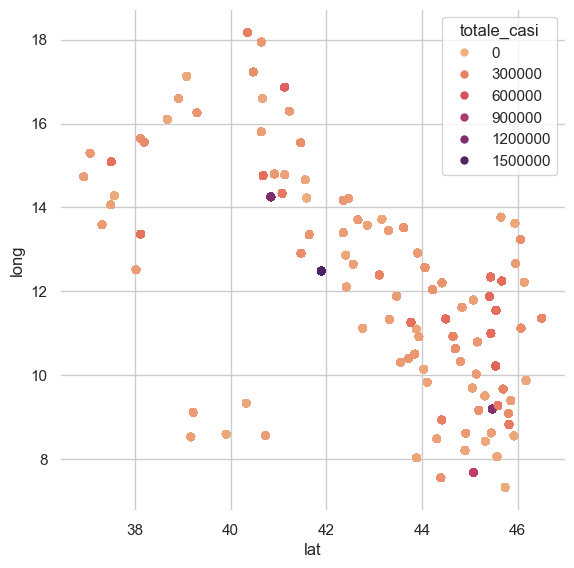

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="lat", y="long",
                hue="totale_casi",
                palette="flare",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

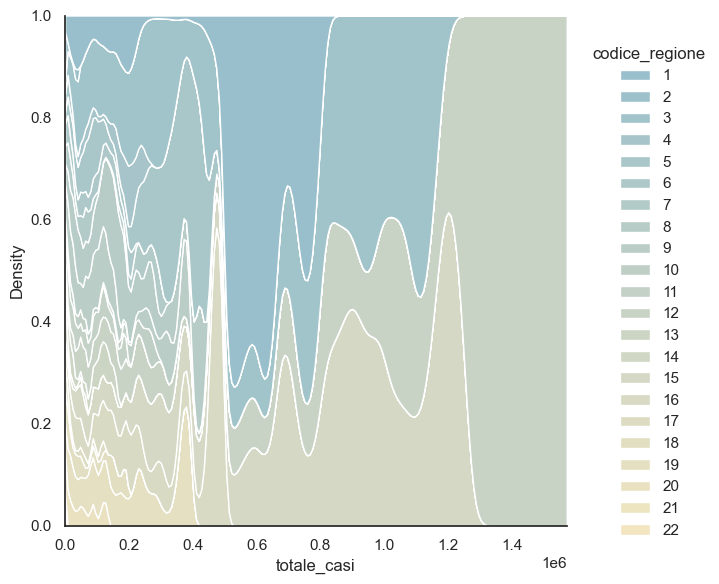

In [7]:
sns.set_theme(style="white")
sns.displot(
    data=df,
    x="totale_casi", hue="codice_regione",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="blend:#7AB,#EDA"
)

C:\Users\david\AppData\Local\Temp\ipykernel_23808\1590616487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="totale_casi", y="denominazione_regione", data=df,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


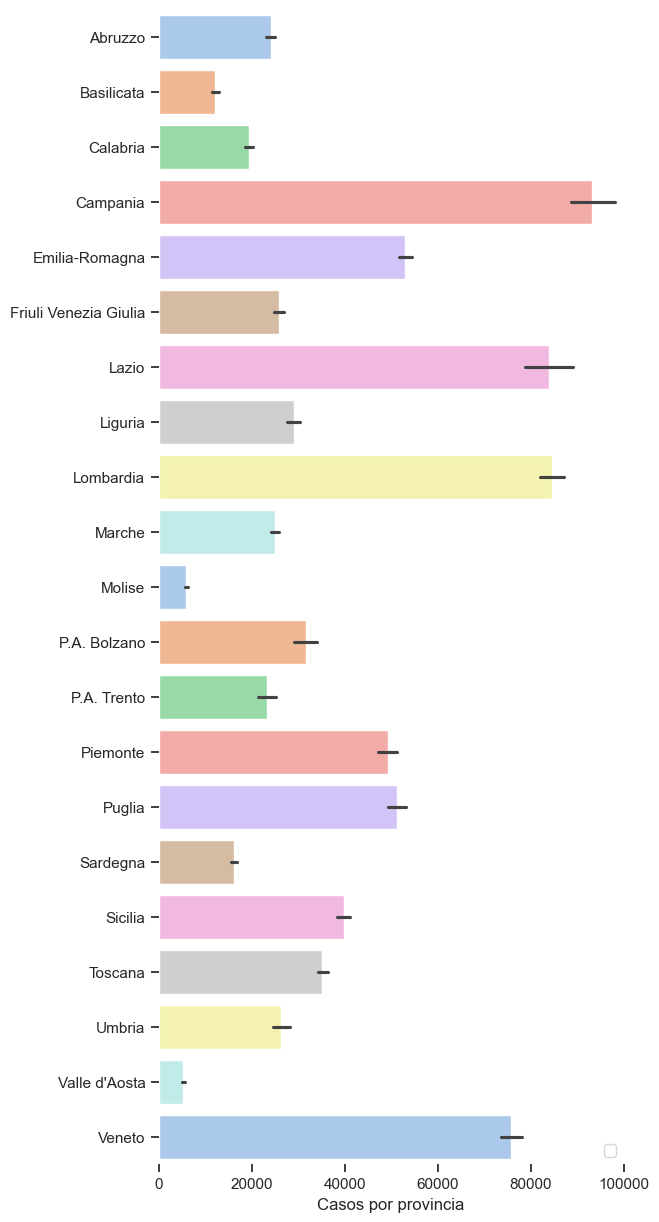

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("muted")
sns.barplot(x="totale_casi", y="denominazione_regione", data=df,
       color="b",palette="pastel")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100000), ylabel="",
       xlabel="Casos por provincia")
sns.despine(left=True, bottom=True)

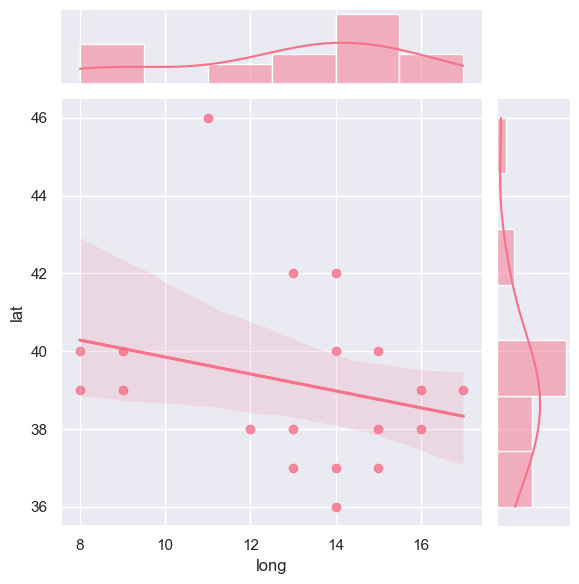

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.set_palette("husl", 9)
sns.jointplot(data=df, x='long', y='lat', kind='reg')
plt.show()

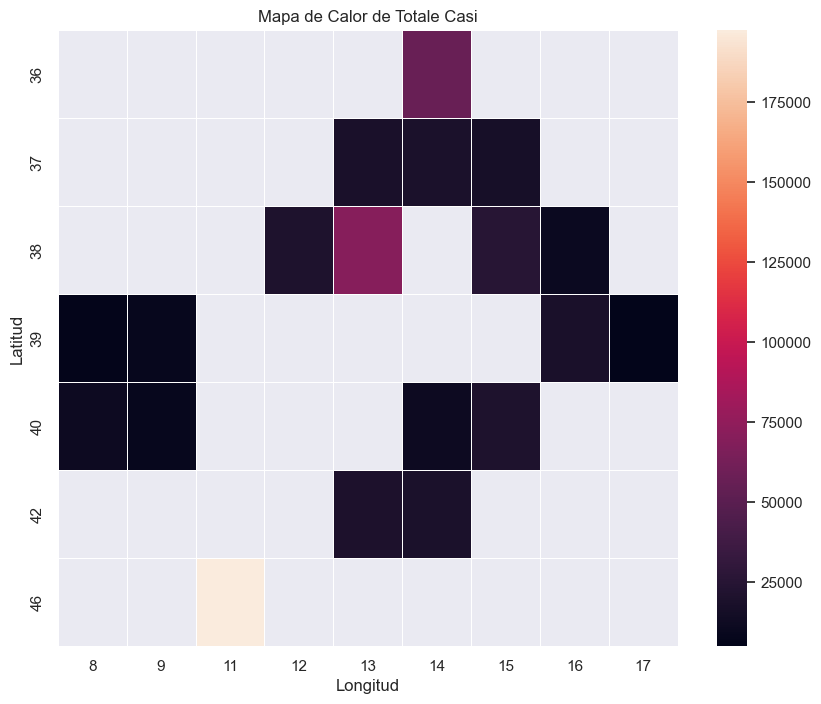

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style='dark')
df['lat'] = df['lat'].round().astype(int)
df['long'] = df['long'].round().astype(int)
pivot_df = df.pivot(index='lat', columns='long', values='totale_casi')
x, y = pivot_df.shape
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap="rocket", linewidths=.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de Calor de Totale Casi')
plt.show()

Máis información:

https://seaborn.pydata.org/examples/index.html
https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
https://seaborn.pydata.org/examples/different_scatter_variables.html